<a href="https://colab.research.google.com/github/shreyakaushik19/codsoft_machinelearning/blob/main/credit_card_fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING THE DEPENDENCIES


In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [184]:
df = pd.read_csv("/content/fraudTest.csv")
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497.0,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1.371817e+09,33.986391,-81.200714,0.0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302.0,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1.371817e+09,39.450498,-109.960431,0.0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496.0,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1.371817e+09,40.495810,-74.196111,0.0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767.0,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1.371817e+09,28.812398,-80.883061,0.0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126.0,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1.371817e+09,44.959148,-85.884734,0.0


In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19466 entries, 0 to 19465
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             19466 non-null  int64  
 1   trans_date_trans_time  19466 non-null  object 
 2   cc_num                 19466 non-null  int64  
 3   merchant               19466 non-null  object 
 4   category               19466 non-null  object 
 5   amt                    19466 non-null  float64
 6   first                  19466 non-null  object 
 7   last                   19466 non-null  object 
 8   gender                 19466 non-null  object 
 9   street                 19466 non-null  object 
 10  city                   19465 non-null  object 
 11  state                  19465 non-null  object 
 12  zip                    19465 non-null  float64
 13  lat                    19465 non-null  float64
 14  long                   19465 non-null  float64
 15  ci

In [186]:
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,19466.000000,1.946600e+04,19466.000000,19465.000000,19465.000000,19465.000000,1.946500e+04,1.946500e+04,19465.000000,19465.000000,19465.000000
mean,9732.500000,4.180289e+17,68.799466,48491.198921,38.528486,-90.049245,9.049912e+04,1.372076e+09,38.521391,-90.049769,0.003493
std,5619.494506,1.310838e+18,139.379023,26813.873613,5.092329,13.625865,3.093242e+05,1.759439e+05,5.130690,13.635438,0.059004
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.163455,-166.464422,0.000000
25%,4866.250000,1.800482e+14,9.482500,25526.000000,34.620500,-96.701000,7.600000e+02,1.371924e+09,34.714781,-96.739825,0.000000
50%,9732.500000,3.520550e+15,46.135000,48043.000000,39.371600,-87.366700,2.470000e+03,1.372027e+09,39.388556,-87.322759,0.000000
75%,14598.750000,4.634956e+15,81.777500,72011.000000,42.015800,-80.128400,2.047800e+04,1.372235e+09,41.997075,-80.161030,0.000000
max,19465.000000,4.992346e+18,6600.440000,99783.000000,65.689900,-67.950300,2.906700e+06,1.372405e+09,66.669356,-66.955602,1.000000


array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'cc_num'}>,
        <Axes: title={'center': 'amt'}>],
       [<Axes: title={'center': 'zip'}>, <Axes: title={'center': 'lat'}>,
        <Axes: title={'center': 'long'}>],
       [<Axes: title={'center': 'city_pop'}>,
        <Axes: title={'center': 'unix_time'}>,
        <Axes: title={'center': 'merch_lat'}>],
       [<Axes: title={'center': 'merch_long'}>,
        <Axes: title={'center': 'is_fraud'}>, <Axes: >]], dtype=object)

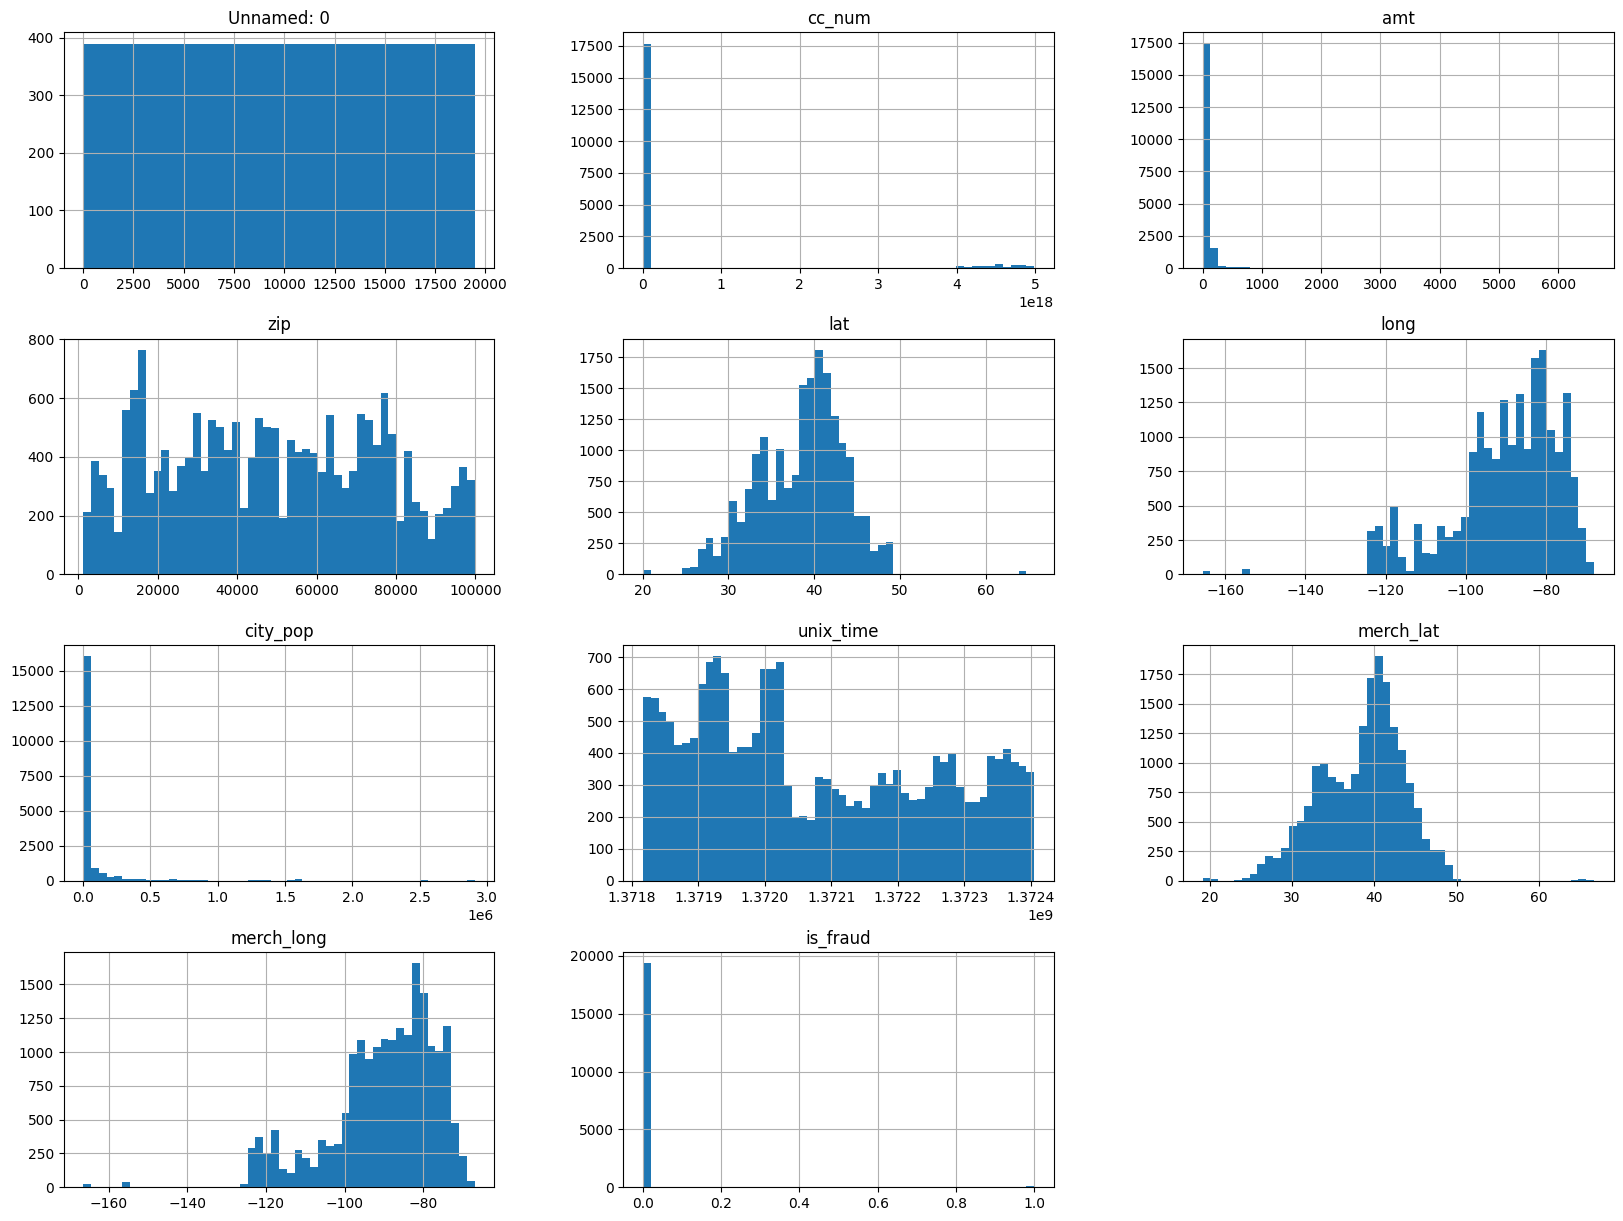

In [187]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50,figsize=(20,15))

In [188]:
import numpy as np
def split_train_test(data,test_ratio):
    np.random.seed(42)
    shuffled=np.random.permutation(len(data))
    print(shuffled)
    test_set_size=int(len(data)*test_ratio)
    test_indices=shuffled[:test_set_size]
    train_indices=shuffled[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

In [190]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(df,test_size=0.2,random_state=42)
print(f"Rows in train set:{len(train_set)}\nRows in test size:{len(test_set)}\n")

Rows in train set:15572
Rows in test size:3894



In [191]:
corr_matrix=df.corr()

<ipython-input-191-a4bfebfd3231>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=df.corr()


In [192]:
corr_matrix['amt'].sort_values(ascending =False)

amt           1.000000
is_fraud      0.206292
long          0.015063
unix_time     0.014914
merch_long    0.014811
cc_num        0.014478
Unnamed: 0    0.013014
merch_lat     0.003859
lat           0.003397
city_pop     -0.003272
zip          -0.013685
Name: amt, dtype: float64

array([[<Axes: xlabel='amt', ylabel='amt'>,
        <Axes: xlabel='cc_num', ylabel='amt'>,
        <Axes: xlabel='lat', ylabel='amt'>,
        <Axes: xlabel='long', ylabel='amt'>],
       [<Axes: xlabel='amt', ylabel='cc_num'>,
        <Axes: xlabel='cc_num', ylabel='cc_num'>,
        <Axes: xlabel='lat', ylabel='cc_num'>,
        <Axes: xlabel='long', ylabel='cc_num'>],
       [<Axes: xlabel='amt', ylabel='lat'>,
        <Axes: xlabel='cc_num', ylabel='lat'>,
        <Axes: xlabel='lat', ylabel='lat'>,
        <Axes: xlabel='long', ylabel='lat'>],
       [<Axes: xlabel='amt', ylabel='long'>,
        <Axes: xlabel='cc_num', ylabel='long'>,
        <Axes: xlabel='lat', ylabel='long'>,
        <Axes: xlabel='long', ylabel='long'>]], dtype=object)

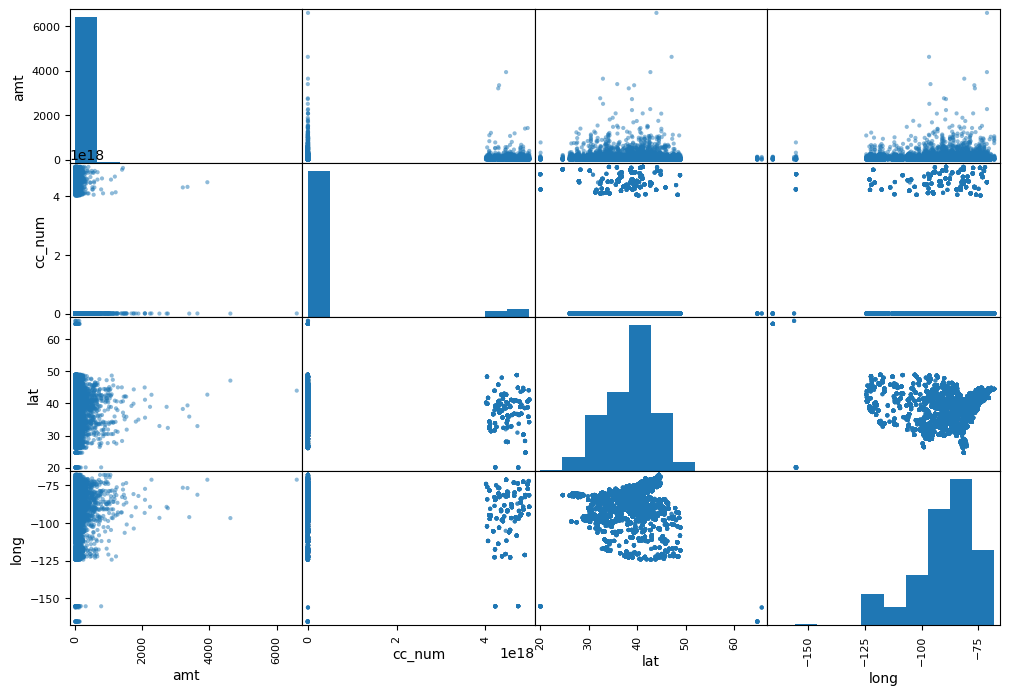

In [193]:
from pandas.plotting import scatter_matrix
attributes=["amt","cc_num","lat","long"]
scatter_matrix(df[attributes],figsize=(12,8))

<Axes: xlabel='amt', ylabel='cc_num'>

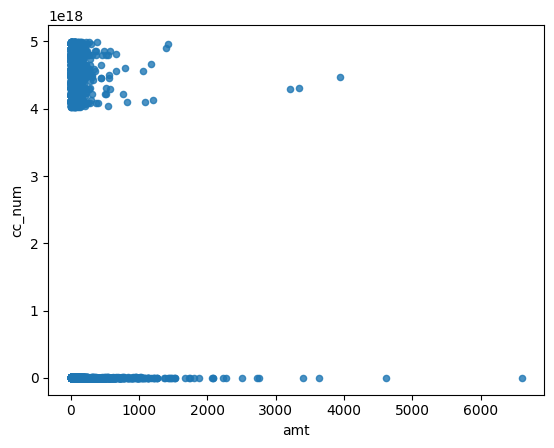

In [194]:
df.plot(kind="scatter",x="amt",y="cc_num",alpha=0.8)

In [195]:
df["cc_numamt"]=df["cc_num"]/df["amt"]

In [196]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,cc_numamt
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,-80.9355,333497.0,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1.371817e+09,33.986391,-81.200714,0.0,8.011063e+14
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,-110.4360,302.0,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1.371817e+09,39.450498,-109.960431,0.0,1.197396e+14
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,-73.5365,34496.0,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1.371817e+09,40.495810,-74.196111,0.0,8.716607e+13
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,-80.8191,54767.0,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1.371817e+09,28.812398,-80.883061,0.0,5.981548e+13
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,-85.0170,1126.0,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1.371817e+09,44.959148,-85.884734,0.0,1.105588e+15


In [197]:
corr_matrix=df.corr()
corr_matrix['lat'].sort_values(ascending=False)

<ipython-input-197-41db62c644a6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=df.corr()


lat           1.000000
merch_lat     0.993689
Unnamed: 0    0.013412
unix_time     0.012714
amt           0.003397
merch_long   -0.001459
long         -0.001856
is_fraud     -0.007660
cc_numamt    -0.042471
cc_num       -0.073113
zip          -0.124188
city_pop     -0.146246
Name: lat, dtype: float64

In [198]:
df['amt'].value_counts()

5.48      15
1.93      14
2.34      14
2.33      13
6.82      13
          ..
32.32      1
161.46     1
55.98      1
55.75      1
74.54      1
Name: amt, Length: 10139, dtype: int64

In [199]:
legit = df[df.amt== 0]
fraud = df[df.amt == 1]

In [200]:
print(legit.shape)
print(fraud.shape)

(0, 24)
(3, 24)


<Axes: xlabel='cc_numamt', ylabel='lat'>

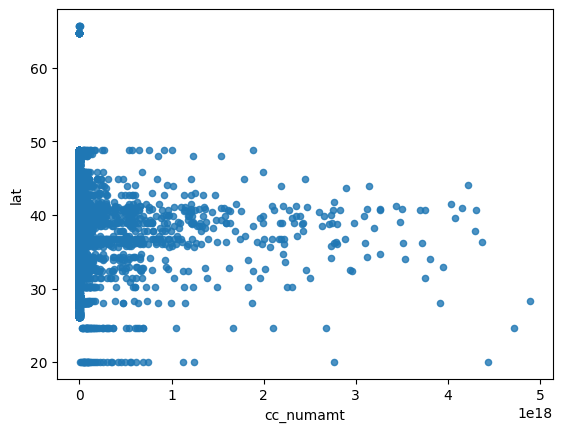

In [201]:
df.plot(kind="scatter",x="cc_numamt",y="lat",alpha=0.8)

In [202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("/fraudTest (2).csv",encoding='ISO-8859-1')

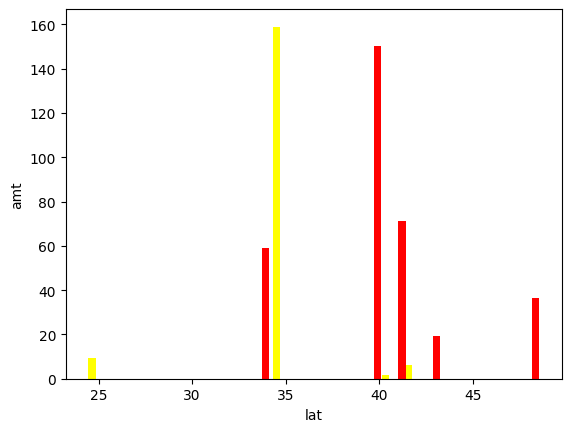

In [203]:
df= df.tail(10)
x=df["lat"]
y=df["amt"]
plt.bar(x,y, color=["red","yellow"],width=0.4)
plt.xlabel("lat")
plt.ylabel("amt")
plt.show()

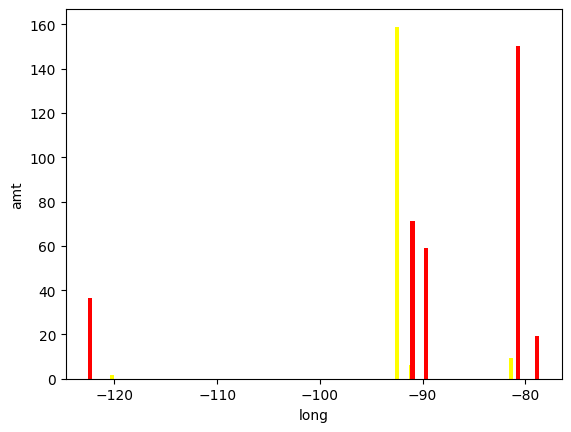

In [204]:
df= df.tail(10)
x=df["long"]
y=df["amt"]
plt.bar(x,y, color=["red","yellow"],width=0.4)
plt.xlabel("long")
plt.ylabel("amt")
plt.show()

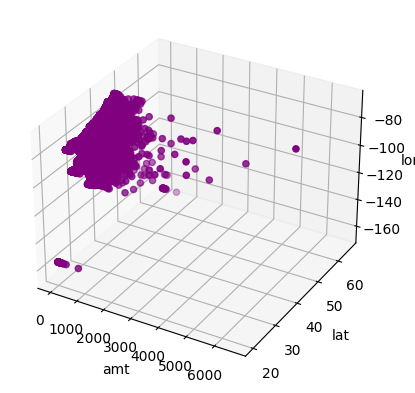

In [205]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
df=pd.read_csv("/fraudTest (2).csv")
x=df["amt"]
y=df["lat"]
z=df["long"]
f=plt.figure()
a=f.add_subplot(111, projection="3d")
a.scatter(x,y,z, color="purple")
a.set_xlabel("amt")
a.set_ylabel("lat")
a.set_zlabel("long")
plt.show()

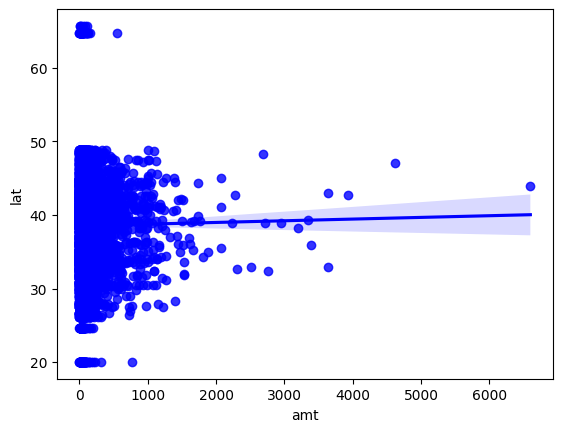

In [206]:
import pandas as pd
import seaborn as sns
housing=pd.read_csv("/fraudTest (2).csv")
x=("amt")
y=("lat")
x_data=housing[x]
y_data=housing[y]
sns.regplot(x=x_data, y=y_data, color="blue")
plt.title("")
plt.xlabel("amt")
plt.ylabel("lat")
plt.show()

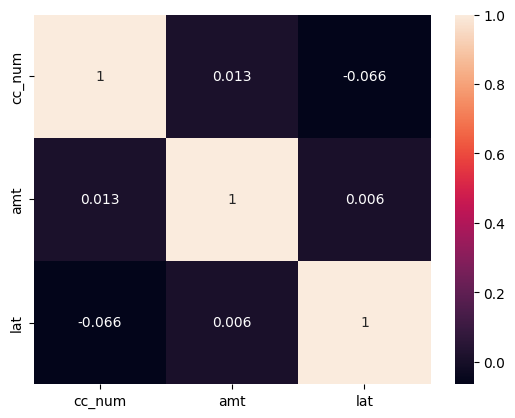

In [207]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv("/fraudTest (2).csv")
cols=["cc_num","amt","lat"]
corr_matrix=df[cols].corr()
sns.heatmap(corr_matrix,annot=True)
plt.show()

In [208]:
from sklearn.neighbors import LocalOutlierFactor

In [245]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import IsolationForest
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [210]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [213]:
legit.amt.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: amt, dtype: float64

In [214]:
fraud.amt.describe()

count    3.0
mean     1.0
std      0.0
min      1.0
25%      1.0
50%      1.0
75%      1.0
max      1.0
Name: amt, dtype: float64

In [216]:
df.groupby('amt').mean()

<ipython-input-216-0904dab08123>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('amt').mean()


,Unnamed: 0,cc_num,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
amt,,,,,,,,,,
1.00,16719.000000,1.351667e+18,39950.142857,37.801886,-85.295314,84295.000000,1.372279e+09,37.846820,-85.723057,0.0
1.01,19005.125000,2.995015e+15,37870.500000,41.063988,-91.089800,8740.000000,1.372356e+09,41.498358,-91.477605,0.0
1.02,21580.833333,2.267058e+18,46025.166667,42.886633,-91.033000,66898.166667,1.372420e+09,42.726987,-90.910241,0.0
1.03,19869.357143,9.431947e+17,40573.714286,37.808200,-86.206329,37220.142857,1.372383e+09,38.066210,-86.184506,0.0
1.04,12712.400000,8.730343e+17,42064.266667,37.174387,-87.931640,149601.466667,1.372161e+09,37.060824,-88.002161,0.0
...,...,...,...,...,...,...,...,...,...,...
3632.96,25864.000000,2.131788e+14,82501.000000,43.035100,-108.202400,19408.000000,1.372545e+09,42.397495,-108.769871,0.0
3640.18,18587.000000,3.527537e+15,29911.000000,32.941300,-81.180700,1725.000000,1.372376e+09,32.786044,-81.439775,0.0
3936.15,15458.000000,4.469777e+18,1844.000000,42.728000,-71.181000,47249.000000,1.372266e+09,42.740770,-70.224448,0.0


In [217]:
new_dataset = pd.concat([legit, fraud], axis=0)

In [218]:
new_dataset.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,cc_numamt
3942,3942,2020-06-22 13:42:53,4897067971111209737,fraud_Johnston-Casper,travel,1.0,Randy,Wood,M,542 Howe Mission Apt. 092,...,-82.6927,42619.0,Environmental education officer,1975-10-07,702d4af26c7e9e7311b8f1b774955481,1.371909e+09,28.745893,-83.478989,0.0,4.897068e+18
4436,4436,2020-06-22 15:57:47,4191109180926792,"fraud_Langworth, Boehm and Gulgowski",shopping_net,1.0,Jennifer,Spencer,F,477 Wheeler Burg,...,-82.7552,4512.0,Farm manager,1992-10-03,b468beb46ee3bbebd43e962ecca733d1,1.371917e+09,40.235605,-82.232475,0.0,4.191109e+15
5258,5258,2020-06-22 19:49:19,571365235126,"fraud_Kuhic, Bins and Pfeffer",shopping_net,1.0,Barbara,Taylor,F,0069 Robin Brooks Apt. 695,...,-86.2141,372.0,"Exhibitions officer, museum/gallery",1995-07-12,0e5e5a49757d0804c928da89403ad8b3,1.371931e+09,44.717170,-86.940090,0.0,5.713652e+11


In [219]:
new_dataset.tail()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,cc_numamt
3942,3942,2020-06-22 13:42:53,4897067971111209737,fraud_Johnston-Casper,travel,1.0,Randy,Wood,M,542 Howe Mission Apt. 092,...,-82.6927,42619.0,Environmental education officer,1975-10-07,702d4af26c7e9e7311b8f1b774955481,1.371909e+09,28.745893,-83.478989,0.0,4.897068e+18
4436,4436,2020-06-22 15:57:47,4191109180926792,"fraud_Langworth, Boehm and Gulgowski",shopping_net,1.0,Jennifer,Spencer,F,477 Wheeler Burg,...,-82.7552,4512.0,Farm manager,1992-10-03,b468beb46ee3bbebd43e962ecca733d1,1.371917e+09,40.235605,-82.232475,0.0,4.191109e+15
5258,5258,2020-06-22 19:49:19,571365235126,"fraud_Kuhic, Bins and Pfeffer",shopping_net,1.0,Barbara,Taylor,F,0069 Robin Brooks Apt. 695,...,-86.2141,372.0,"Exhibitions officer, museum/gallery",1995-07-12,0e5e5a49757d0804c928da89403ad8b3,1.371931e+09,44.717170,-86.940090,0.0,5.713652e+11


In [220]:
new_dataset['long'].value_counts()

-82.6927    1
-82.7552    1
-86.2141    1
Name: long, dtype: int64

In [221]:
X = new_dataset.drop(columns='long', axis=1)
Y = new_dataset['long']

In [222]:
print(X)

      Unnamed: 0 trans_date_trans_time               cc_num  \
3942        3942   2020-06-22 13:42:53  4897067971111209737   
4436        4436   2020-06-22 15:57:47     4191109180926792   
5258        5258   2020-06-22 19:49:19         571365235126   

                                  merchant      category  amt     first  \
3942                 fraud_Johnston-Casper        travel  1.0     Randy   
4436  fraud_Langworth, Boehm and Gulgowski  shopping_net  1.0  Jennifer   
5258         fraud_Kuhic, Bins and Pfeffer  shopping_net  1.0   Barbara   

         last gender                      street  ...      lat city_pop  \
3942     Wood      M   542 Howe Mission Apt. 092  ...  28.3011  42619.0   
4436  Spencer      F            477 Wheeler Burg  ...  39.6251   4512.0   
5258   Taylor      F  0069 Robin Brooks Apt. 695  ...  44.5995    372.0   

                                      job         dob  \
3942      Environmental education officer  1975-10-07   
4436                         Fa

In [223]:
print(Y)


3942   -82.6927
4436   -82.7552
5258   -86.2141
Name: long, dtype: float64


In [228]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [229]:
print(X.shape, X_train.shape, X_test.shape)

(3, 23) (2, 23) (1, 23)


In [233]:
df['is_fraud'].value_counts()

0.0    30988
1.0      135
Name: is_fraud, dtype: int64

In [234]:
fraud = df[df['is_fraud']==1]

normal = df[df['is_fraud']==0]

In [235]:
print(fraud.shape,normal.shape)

(135, 23) (30988, 23)


In [236]:
fraud.amt.describe()

count     135.000000
mean      551.919778
std       389.419335
min         4.640000
25%       277.040000
50%       520.020000
75%       909.705000
max      1197.260000
Name: amt, dtype: float64

In [237]:
normal.amt.describe()

count    30988.000000
mean        67.083376
std        126.746885
min          1.000000
25%          9.560000
50%         46.415000
75%         82.440000
max       6600.440000
Name: amt, dtype: float64

In [238]:
df_sample= df.sample(frac = 0.1,random_state=1)

df_sample.shape

(3112, 23)

In [240]:
df.shape

(31124, 23)

In [241]:
Fraud = df_sample[df_sample['is_fraud']==1]

Valid = df_sample[df_sample['is_fraud']==0]

outlier_fraction = len(Fraud)/float(len(Valid))

In [242]:
print(outlier_fraction)

print("Fraud Cases : {}".format(len(Fraud)))

print("Valid Cases : {}".format(len(Valid)))

0.005817711700064641
Fraud Cases : 18
Valid Cases : 3094


In [243]:
#Create independent and Dependent Features
columns = df_sample.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["is_fraud"]]
# Store the variable we are predicting
target = "is_fraud"
# Define a random state
state = np.random.RandomState(42)
X = df_sample[columns]
Y = df_sample[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(3112, 22)
(3112,)


In [246]:
classifiers = {
    "Isolation Forest":IsolationForest(n_estimators=100, max_samples=len(X),
                                       contamination=outlier_fraction,random_state=state, verbose=0),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20, algorithm='auto',
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination=outlier_fraction),
}

type(classifiers)

dict

In [247]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for column_name in X.columns:
    if X[column_name].dtype == object:
        X[column_name] = le.fit_transform(X[column_name])
    else:
        pass

<ipython-input-247-df4e8b2b4e31>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column_name] = le.fit_transform(X[column_name])
<ipython-input-247-df4e8b2b4e31>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column_name] = le.fit_transform(X[column_name])
<ipython-input-247-df4e8b2b4e31>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

In [248]:
n_outliers = len(Fraud)
for i, (clf_name,clf) in enumerate(classifiers.items()):
    #Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_prediction = clf.negative_outlier_factor_
    else:
        clf.fit(X)
        scores_prediction = clf.decision_function(X)
        y_pred = clf.predict(X)
    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != Y).sum()
    # Run Classification Metrics
    print("{}: {}".format(clf_name,n_errors))
    print("Accuracy Score :")
    print(accuracy_score(Y,y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Isolation Forest: 35
Accuracy Score :
0.9887532133676092
Local Outlier Factor: 37
Accuracy Score :
0.9881105398457584


Observations :

Isolation Forest has a 98.87% which is more accurate than LOF of 98.81%.

When comparing error precision & recall for 2 models , the Isolation Forest performed much better than the LOF.